#0. ANALIS SENTIMEN ULASAN GOOGLE PLAYSTORE


#1. Scraper google playstore (pengambilan data)


In [1]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/
#download library google-play-scraper
!pip install google-play-scraper

In [2]:
#import beberapa libray yangg digunakan untuk pengambilan sebuah data
from google_play_scraper import app

import pandas as pd
import numpy as np

In [3]:
#pengambilan ulasan yang di inginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'id.go.kpu.sirekap2024', #api dari TELEGRAM , bisa diambil dengan cara melihat link appp tersebut di playstore pada saat membuka app tersebut
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant atau bisa juga yang terbaru
    count=15000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [4]:
scraper = pd.DataFrame(np.array(result),columns=['review'])
scraper = scraper.join(pd.DataFrame(scraper.pop('review').tolist()))

scraper.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cecae6f3-b000-42b3-aaa0-b13bbb7bcafe,Khoirul Tamam,https://play-lh.googleusercontent.com/a-/ALV-U...,"APLIKASI GAGAL. Suka nge bug, over akses bikin...",1,247,2.41,2024-02-16 12:29:00,None,None,2.41
1,cebb64c8-9e5e-48cf-b491-848ab8cebf9b,Fajar Agus Maulana,https://play-lh.googleusercontent.com/a-/ALV-U...,"APLIKASI GAGAL. Banyak bug, over akses jadi Le...",1,1,2.48,2024-02-21 09:10:37,None,None,2.48
2,523ce293-f1e9-498b-91e5-6594b0036f81,Septia Widio Warman,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi belum layak untuk dioperasikan 1.bisa...,1,3164,2.30,2024-02-04 17:55:12,None,None,2.30
3,0b150f52-e90f-4353-a918-73567ae44347,Abiel Thea,https://play-lh.googleusercontent.com/a-/ALV-U...,"Mohon dibenahi kembali, tulisan X kadang serin...",2,221,2.32,2024-02-07 19:29:18,None,None,2.32
4,e4df8396-aad2-4ebe-949b-8e8f7fd5910e,Eka Aulia,https://play-lh.googleusercontent.com/a/ACg8oc...,Berdasarkan hasil pengalaman simulasi banyak s...,1,838,2.32,2024-02-07 08:24:07,None,None,2.32


In [5]:
#untuk melihat jumlah data yang didapatkan apakah sudah sesuai apa belum
len(scraper)

15000

In [6]:
scraper[['userName', 'score','at', 'content']].head() #disini kita memfilter atribut yang dibutuhakan saja

,userName,score,at,content
0,Khoirul Tamam,1,2024-02-16 12:29:00,"APLIKASI GAGAL. Suka nge bug, over akses bikin..."
1,Fajar Agus Maulana,1,2024-02-21 09:10:37,"APLIKASI GAGAL. Banyak bug, over akses jadi Le..."
2,Septia Widio Warman,1,2024-02-04 17:55:12,Aplikasi belum layak untuk dioperasikan 1.bisa...
3,Abiel Thea,2,2024-02-07 19:29:18,"Mohon dibenahi kembali, tulisan X kadang serin..."
4,Eka Aulia,1,2024-02-07 08:24:07,Berdasarkan hasil pengalaman simulasi banyak s...


In [7]:

data = scraper[['userName', 'score','at', 'content']]

sortir = data.sort_values(by='at', ascending=False) #mengurut kan berdasarkan data terbaru , ubah ke true untuk mengurutkan dari data terlama

sortir.head()

,userName,score,at,content
14591,Warung Madina,1,2024-02-21 20:15:08,Penasaran setelah aplikasi ini menjadi buah bi...
14802,add_it ya,1,2024-02-21 19:32:02,"Tolonglah dicoba dulu sebelum dipakai, ini uda..."
14608,Heru Setiawahyudi,1,2024-02-21 18:23:57,Aplikasi pembuat kegaduhan!!!
14587,Menk Cell,3,2024-02-21 18:08:38,Sirekap bikin geleng ketua kpps..... Data suda...
14590,Rosyid M,1,2024-02-21 17:55:48,itu yang ngasih bintang lebih dari satu punya ...


In [8]:
data = sortir[['userName', 'score','at', 'content']]

In [9]:
data =data[['score', 'content']] #simpan hasil sortir ke varibel data kembali, disini kita juga memfilter lagi untuk menghilangkan user name
data.head(15000)

,score,content
14591,1,Penasaran setelah aplikasi ini menjadi buah bi...
14802,1,"Tolonglah dicoba dulu sebelum dipakai, ini uda..."
14608,1,Aplikasi pembuat kegaduhan!!!
14587,3,Sirekap bikin geleng ketua kpps..... Data suda...
14590,1,itu yang ngasih bintang lebih dari satu punya ...
...,...,...
10525,5,tinggal nunggu pps kasih user name dan pasword
7426,1,"Pemilu h-3 Minggu, aplikasi sepenting ini masi..."
14055,5,"Semoga Tambah Baik,Mudah Dalam Input Dan Share..."
11273,5,Semoga tidak seperti sirekap 2020 yang saat di...


In [10]:
#menghitung jumlah rating
data['score'].value_counts()

1    11056
5     1479
2     1292
3      821
4      352
Name: score, dtype: int64

#2. Labeling

label = 1 = sangat negatif ,2-3 = negatif,  4-5 = positif

In [11]:
def labeling(score):
  if score == 1 :
    return -1
  elif score <= 3 :
    return 1
  else:
    return 0
data['label'] = data['score'].apply(labeling)
data.head(50)

,score,content,label
14591,1,Penasaran setelah aplikasi ini menjadi buah bi...,-1
14802,1,"Tolonglah dicoba dulu sebelum dipakai, ini uda...",-1
14608,1,Aplikasi pembuat kegaduhan!!!,-1
14587,3,Sirekap bikin geleng ketua kpps..... Data suda...,1
14590,1,itu yang ngasih bintang lebih dari satu punya ...,-1
14585,2,"Awalnya biasa saja, kadang susah login dan pad...",1
14807,1,"Aplikasi buruk, bikin orang tambah susah mendi...",-1
14624,1,aplikasi nda kerjasama,-1
14621,1,Aplikasi sering eror,-1
14593,1,Sirekap tidak bisa login padahal kata sandi be...,-1


In [12]:
#menyimpan hasil pelabelan ke csv

data.to_csv('scraped.csv', index = False)

In [13]:
#menghitung jumlah label
data['label'].value_counts()

-1    11056
 1     2113
 0     1831
Name: label, dtype: int64

#3. tahap preprocessing

In [14]:
import nltk #mengimport library naatural lenguage toolkit
nltk.download('punkt') #mengunduh package punkt
nltk.download('stopword') # mengunduh package stopword
nltk.download('wordnet') # mengunuh package wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
import pandas as pd
pd.set_option('display.max_columns', None)
data = pd.read_csv('/content/scraped.csv')
data.head()

,score,content,label
0,1,Penasaran setelah aplikasi ini menjadi buah bi...,-1
1,1,"Tolonglah dicoba dulu sebelum dipakai, ini uda...",-1
2,1,Aplikasi pembuat kegaduhan!!!,-1
3,3,Sirekap bikin geleng ketua kpps..... Data suda...,1
4,1,itu yang ngasih bintang lebih dari satu punya ...,-1


**DATA CLEANING**

In [16]:
data['content'] = data['content'].str.replace('https\S+', ' ', case=False)#menghapus url dikolom content
data['content'] = data['content'].str.lower() #merubah menjadi huruf kecil
data['content'] = data['content'].str.replace('@\S+', ' ', case=False) #menghapus mention
data['content'] = data['content'].str.replace('#\S+', ' ', case=False)#menghapus hastag
data['content'] = data['content'].str.replace("\'\w+", ' ', case=False)#menghapus next karakter
data['content'] = data['content'].str.replace("[^\w\s]", ' ', case=False)#menghapus tanda baca
data['content'] = data['content'].str.replace("\s(2)", ' ', case=False)#menghapus white space

<ipython-input-16-18eda8c92238>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('https\S+', ' ', case=False)#menghapus url dikolom content
<ipython-input-16-18eda8c92238>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('@\S+', ' ', case=False) #menghapus mention
<ipython-input-16-18eda8c92238>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('#\S+', ' ', case=False)#menghapus hastag
<ipython-input-16-18eda8c92238>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace("\'\w+", ' ', case=False)#menghapus next karakter
<ipython-input-16-18eda8c92238>:6: FutureWarning: The default value of regex will change from Tru

**normalisasi**


merupakan cara untuk menormal kan kata2 yang singkat / tidak baku

In [17]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', 'pdhl': ' padahal ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'sy':'saya', 'gx':' tidak ', ' dgn ':' dengan ', 'knp':' kenapa', 'ch':'chanel', 'gc':' group chanel'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['content'] = data['content'].apply(lambda x: normalisasi(x))

In [18]:
data.head()

,score,content,label
0,1,penasaran setelah aplikasi ini menjadi buah bi...,-1
1,1,tolonglah dicoba dulu sebelum dipakai ini uda...,-1
2,1,aplikasi pembuat kegaduhan,-1
3,3,sirekap bikin geleng ketua kpps data suda...,1
4,1,itu yang ngasih bintang lebih dari satu punya ...,-1


**TOKENIZING**

proses pemotongan teks menjadi bagian-bagian yang lebih kecil, yang disebut token. Pada proses ini juga dilakukan penghilangan angka, tanda baca dan karakter lain yang dianggap tidak memiliki pengaruh terhadap pemrosesan teks.

In [19]:
#mengimport word tokenize dari modul nltk
from nltk.tokenize import word_tokenize

In [20]:
from nltk.tokenize import RegexpTokenizer #mengimport regex tokenizer
regex = RegexpTokenizer('\w+')
data['text_token'] = data['content'].apply(regex.tokenize)#menambahkan kolom content_token pada dataframe data
data.head(5)

,score,content,label,text_token
0,1,penasaran setelah aplikasi ini menjadi buah bi...,-1,"[penasaran, setelah, aplikasi, ini, menjadi, b..."
1,1,tolonglah dicoba dulu sebelum dipakai ini uda...,-1,"[tolonglah, dicoba, dulu, sebelum, dipakai, in..."
2,1,aplikasi pembuat kegaduhan,-1,"[aplikasi, pembuat, kegaduhan]"
3,3,sirekap bikin geleng ketua kpps data suda...,1,"[sirekap, bikin, geleng, ketua, kpps, data, su..."
4,1,itu yang ngasih bintang lebih dari satu punya ...,-1,"[itu, yang, ngasih, bintang, lebih, dari, satu..."


**Filtering (Stopword Removal)**

**Filtering** adalah tahap mengambil kata-kata penting dari hasil token dengan menggunakan algoritma stoplist (membuang kata kurang penting) atau wordlist (menyimpan kata penting).

**Stopword** adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Contoh stopword dalam bahasa Indonesia adalah “yang”, “dan”, “di”, “dari”, dll. Makna di balik penggunaan stopword yaitu dengan menghapus kata-kata yang memiliki informasi rendah dari sebuah teks, kita dapat fokus pada kata-kata penting sebagai gantinya.

Contoh penggunaan filtering dapat kita temukan pada konteks mesin pencarian. Jika permintaan pencarian anda adalah “apa itu pengertian manajemen?” tentunya anda ingin sistem pencarian fokus pada memunculkan dokumen dengan topik tentang “pengertian manajemen” di atas dokumen dengan topik “apa itu”. Hal ini dapat dilakukan dengan mencegah kata dari daftar stopword dianalisa.

https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

In [21]:
import nltk

nltk.download('stopwords') #mengunduh stopword

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords #mengimport stopword

# membuat daftar stopword dalam bahasa indonesia
stopwords = nltk.corpus.stopwords.words("indonesian")

In [23]:
# Remove stopwords
data['text_token'] = data['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
data.head(3)

,score,content,label,text_token
0,1,penasaran setelah aplikasi ini menjadi buah bi...,-1,"[penasaran, aplikasi, buah, bibir, donwload, l..."
1,1,tolonglah dicoba dulu sebelum dipakai ini uda...,-1,"[tolonglah, dicoba, dipakai, udah, bug, nyalah..."
2,1,aplikasi pembuat kegaduhan,-1,"[aplikasi, pembuat, kegaduhan]"


**STEMING**

Stemming adalah teknik pemrosesan bahasa alami yang menurunkan infleksi kata ke bentuk akarnya, sehingga membantu dalam pra-pemrosesan teks, kata, dan dokumen untuk normalisasi teks.

Menurut Wikipedia, infleksi adalah proses di mana sebuah kata dimodifikasi untuk mengkomunikasikan banyak kategori tata bahasa, termasuk tegang, kasus, suara, aspek, orang, jumlah, jenis kelamin, dan suasana hati. Jadi, meskipun sebuah kata mungkin ada dalam beberapa bentuk infleksi, memiliki beberapa bentuk infleksi di dalam teks yang sama menambah redundansi pada proses NLP.

Akibatnya, kami menggunakan stemming untuk mengurangi kata ke bentuk dasar atau stem, yang mungkin atau mungkin bukan kata yang sah dalam bahasa tersebut.

Misalnya, batang dari ketiga kata ini, koneksi, terhubung, menghubungkan, adalah "menghubungkan". Di sisi lain, akar masalah, masalah, dan masalah adalah "masalah", yang bukan kata yang dikenal.

In [24]:
!pip install Sastrawi #install modul sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [25]:
#import sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

#create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [26]:
data['steamed'] = data['text_token'].apply(lambda x: [stemmer.stem(y) for y in x]) #proses stemming setiap kata.

In [27]:
data.head(5)

,score,content,label,text_token,steamed
0,1,penasaran setelah aplikasi ini menjadi buah bi...,-1,"[penasaran, aplikasi, buah, bibir, donwload, l...","[penasaran, aplikasi, buah, bibir, donwload, l..."
1,1,tolonglah dicoba dulu sebelum dipakai ini uda...,-1,"[tolonglah, dicoba, dipakai, udah, bug, nyalah...","[tolong, coba, pakai, udah, bug, nyalahin, use..."
2,1,aplikasi pembuat kegaduhan,-1,"[aplikasi, pembuat, kegaduhan]","[aplikasi, buat, gaduh]"
3,3,sirekap bikin geleng ketua kpps data suda...,1,"[sirekap, bikin, geleng, ketua, kpps, data, in...","[sirekap, bikin, geleng, ketua, kpps, data, in..."
4,1,itu yang ngasih bintang lebih dari satu punya ...,-1,"[ngasih, bintang, sih, dihidupnya, aplikasi, g...","[ngasih, bintang, sih, hidup, aplikasi, ga, bu..."


In [28]:
data['text_string'] = data['steamed'].apply(lambda x: ' '.join([item for item in x if len(item)>2])) #merubah dari token kedalam bentuk kalimat

In [29]:
data.head()

,score,content,label,text_token,steamed,text_string
0,1,penasaran setelah aplikasi ini menjadi buah bi...,-1,"[penasaran, aplikasi, buah, bibir, donwload, l...","[penasaran, aplikasi, buah, bibir, donwload, l...",penasaran aplikasi buah bibir donwload log bom...
1,1,tolonglah dicoba dulu sebelum dipakai ini uda...,-1,"[tolonglah, dicoba, dipakai, udah, bug, nyalah...","[tolong, coba, pakai, udah, bug, nyalahin, use...",tolong coba pakai udah bug nyalahin usernya hadeh
2,1,aplikasi pembuat kegaduhan,-1,"[aplikasi, pembuat, kegaduhan]","[aplikasi, buat, gaduh]",aplikasi buat gaduh
3,3,sirekap bikin geleng ketua kpps data suda...,1,"[sirekap, bikin, geleng, ketua, kpps, data, in...","[sirekap, bikin, geleng, ketua, kpps, data, in...",sirekap bikin geleng ketua kpps data input kar...
4,1,itu yang ngasih bintang lebih dari satu punya ...,-1,"[ngasih, bintang, sih, dihidupnya, aplikasi, g...","[ngasih, bintang, sih, hidup, aplikasi, ga, bu...",ngasih bintang sih hidup aplikasi buka mudah s...


In [30]:
data.to_csv('hasil_prepocessing.csv') #menyimpan hasil preposcessing

# WORDCLOUD


wordcloud digunakan untuk memunculkan citraan visual dari sebuah teks tertulis kemudian dapat dijadikan sebagai sebuah alat bantu dalam melakukan analisis teks.
kata-kata yang ada digambarkan kedalam suatu visualisasi dimana besar kecilnya huruf bergantung pada frekuensi munculnya kata tersebut didalam teks.
singkatnya adalah kata terbesar adalah kata yang paling sering muncul dalam suatu data.


In [31]:
import pandas as pd
data = pd.read_csv("/content/hasil_prepocessing.csv")

In [32]:
!pip install wordcloud #install wordcloud

**positif**

In [33]:
data_positif = data[data['label']==0]#memfilter kolom sentiment = 0(positif)

In [34]:
# Convert the 'text_string' column to strings
data_positif['text_string'] = data_positif['text_string'].astype(str)
all_word_pos =' '.join([word for word in data_positif['text_string']]) #menggabungkan semua isi kolom text_string

<ipython-input-34-9a0f4d45b366>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_positif['text_string'] = data_positif['text_string'].astype(str)


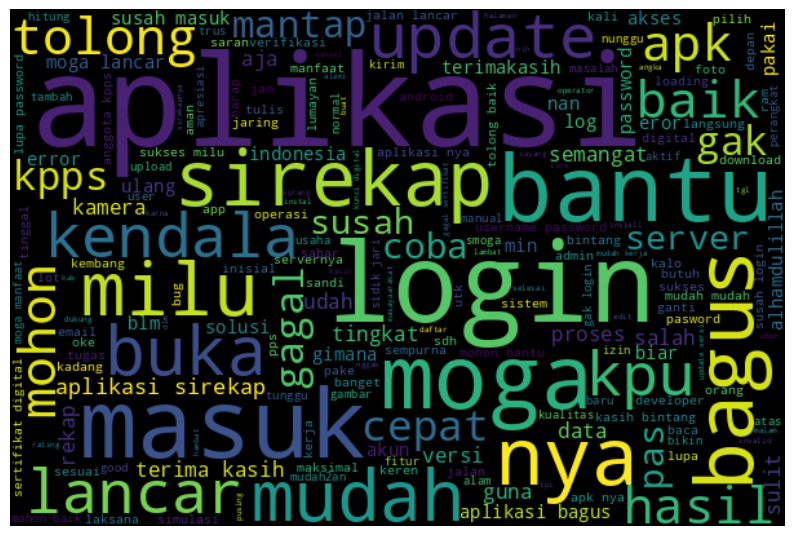

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_word_pos)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**WORDCLOUD SENTIMEN NEGATIF**

In [36]:
data_negatif = data[data['label']==1]#memfilter kolom sentiment = 1 (NEGATIF)
# Convert the 'text_string' column to strings
data_negatif['text_string'] = data_negatif['text_string'].astype(str)

# Join the words
all_word_nen = ' '.join([word for word in data_negatif['text_string']])


<ipython-input-36-f2188903fb06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_negatif['text_string'] = data_negatif['text_string'].astype(str)


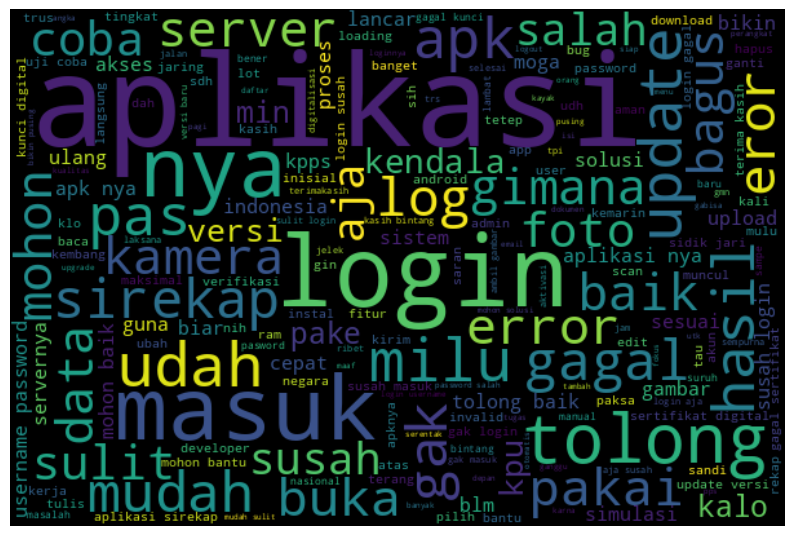

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_word_nen)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

**sangat negatif**

In [38]:
data_sanegatif = data[data['label']==-1]#memfilter kolom sentiment = -1 (sangat NEGATIF)
# Convert the 'text_string' column to strings
data_sanegatif['text_string'] = data_sanegatif['text_string'].astype(str)

# Join the words
all_word_sanen = ' '.join([word for word in data_sanegatif['text_string']])


<ipython-input-38-a27fab5fdbb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sanegatif['text_string'] = data_sanegatif['text_string'].astype(str)


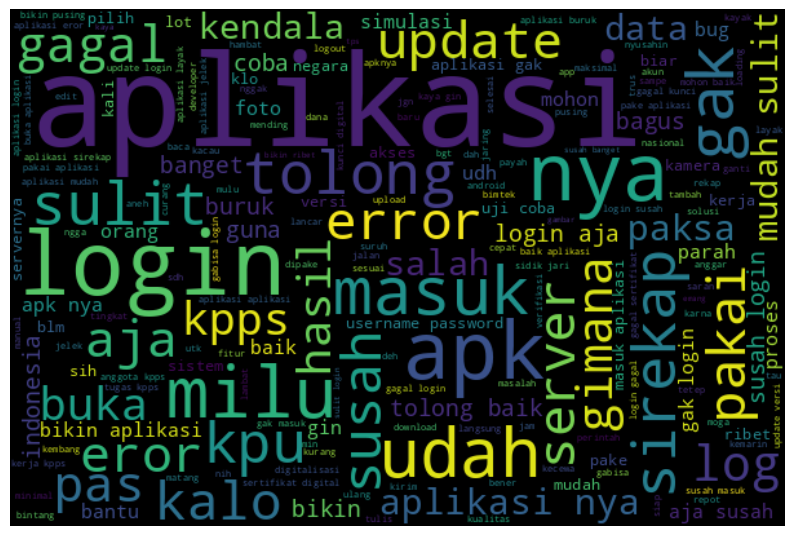

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_word_sanen)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

<function matplotlib.pyplot.show(close=None, block=None)>

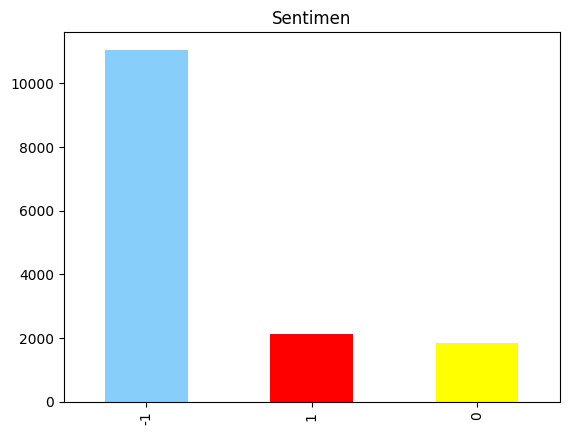

In [40]:
sentimen = pd.value_counts(data['label'], sort = True)
sentimen.plot(kind = 'bar', color =['lightskyblue', 'red','yellow'])

plt.title('Sentimen')
plt.show

In [41]:
#import library yang diperlukan untuk

#basic
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer #tf-idf

from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced

#model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#perfomance matric
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score


# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings



warnings.filterwarnings('ignore')

In [42]:
X = data['text_string'] # X = kolom text string
y = data['label'] # y = kolom label

**menghitung kata dengan TF-IDF**

TF-IDF singkatan dari "Term Frequency-Inverse Document Frequency". Ini adalah teknik yang digunakan dalam pemrosesan bahasa alami dan pengambilan informasi untuk mengevaluasi seberapa penting sebuah kata dalam dokumen tertentu dalam sebuah koleksi dokumen atau korpus teks.

In [43]:
# Asumsikan X adalah pandas Series atau DataFrame yang berisi data teks
# Mengganti nilai NaN dengan sebuah string kosong
X.fillna('', inplace=True)

tfid = TfidfVectorizer()
X_final = tfid.fit_transform(X)

**HANDLING IMBALANCE**

In [44]:
# HANDLING IMBALANCE menggunakan smote

smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [71]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.10, random_state=0)

# MODELING



**1. SVM**

In [72]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [73]:
svm_prediction =  svm.predict(X_test)

In [74]:
accuracy_score(svm_prediction,y_test)

0.8754899005125113

In [75]:
print('SVM')
print(classification_report(y_test, svm_prediction))

SVM
              precision    recall  f1-score   support

          -1       0.84      0.94      0.89      1090
           0       0.91      0.86      0.89      1107
           1       0.88      0.82      0.85      1120

    accuracy                           0.88      3317
   macro avg       0.88      0.88      0.88      3317
weighted avg       0.88      0.88      0.87      3317



In [76]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[1030,   28,   32],
       [  56,  955,   96],
       [ 134,   67,  919]])

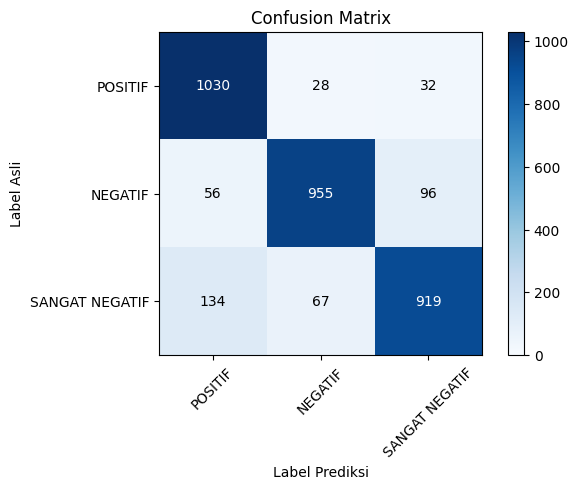

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Contoh matriks kebingungan
# Anda dapat mengganti matriks ini dengan hasil sesungguhnya dari model Anda
confusion_matrix = np.array([[1030,   28,   32],
                            [  56,  955,   96],
                            [ 134,   67,  919]])
# Plot matriks kebingungan
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues, vmin=0)
plt.title('Confusion Matrix')
plt.colorbar()

# Tandai sumbu
classes = ['POSITIF','NEGATIF', 'SANGAT NEGATIF']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Tambahkan angka di dalam sel
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Label Asli')
plt.xlabel('Label Prediksi')
plt.show()
